In [350]:
import pandas as pd
df = pd.read_csv('ks-projects-201801.csv')
dforig = pd.read_csv('ks-projects-201801.csv')

In [351]:
dforig.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Data Cleansing

Removing nulls, checking types, checking row uniqueness, checking data values, getting timeframe differrence, checking if some data is invalid(I dont' see a rule in this last point)

In [352]:
df.dropna(inplace=True)
df.shape

(374860, 15)

In [353]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

###### the numbered data are really numbers, no need to convert any type

In [354]:
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

###### Above seems we will need to keep only the "failed" and "succesfful" states. But first let us get rid of some of unseful columns

In [355]:
df.drop(['ID','category','currency'],axis=1,inplace=True)

###### generating the timeframe columns then get rid of the deadline and launched columns

In [356]:
from datetime import datetime
def days_between(dd1, dd2):
    ddres=[]
    for d1,d2 in zip(dd1,dd2):
        d1 = datetime.strptime(d1, "%Y-%m-%d")
        d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
        ddres.append(abs((d2 - d1).days))
    return ddres

df['timeframe']=days_between(df['deadline'],df['launched'])

In [357]:
df.drop(['deadline','launched'],axis=1, inplace=True)
df.drop(['country','name'],axis=1,inplace=True)
df.head()

,main_category,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe
0,Publishing,1000.0,0.0,failed,0,0.0,0.0,1533.95,59
1,Film & Video,30000.0,2421.0,failed,15,100.0,2421.0,30000.00,60
2,Film & Video,45000.0,220.0,failed,3,220.0,220.0,45000.00,45
3,Music,5000.0,1.0,failed,1,1.0,1.0,5000.00,30
4,Film & Video,19500.0,1283.0,canceled,14,1283.0,1283.0,19500.00,56


In [358]:
df=df[df.state.isin(['failed','successful'])]

In [359]:
df.shape

(331462, 9)

In [360]:
df

,main_category,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe
0,Publishing,1000.0,0.0,failed,0,0.0,0.0,1533.95,59
1,Film & Video,30000.0,2421.0,failed,15,100.0,2421.0,30000.00,60
2,Film & Video,45000.0,220.0,failed,3,220.0,220.0,45000.00,45
3,Music,5000.0,1.0,failed,1,1.0,1.0,5000.00,30
5,Food,50000.0,52375.0,successful,224,52375.0,52375.0,50000.00,35
...,...,...,...,...,...,...,...,...,...
378654,Food,6500.0,154.0,failed,4,0.0,154.0,6500.00,30
378657,Film & Video,1500.0,155.0,failed,5,155.0,155.0,1500.00,27
378658,Film & Video,15000.0,20.0,failed,1,20.0,20.0,15000.00,46
378659,Technology,15000.0,200.0,failed,6,200.0,200.0,15000.00,31


chaning state column to 0 or 1

In [361]:
df.loc[df['state']=='failed','result']=0
df.loc[df['state']=='successful','result']=1

In [362]:
df.drop(['state'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DC2F0ACC8>,
      dtype=object)

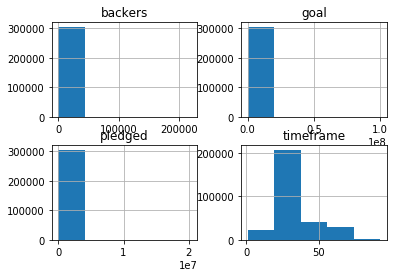

In [363]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
#ax.boxplot(df['backers'])
#ax.hist(df['goal'].T)
#plt.show()
df[['backers','goal','timeframe','pledged']].hist(bins=5)

Above shows that timeframe has a normal distribution, while others are very centric

In [364]:
features=df.drop('result',axis=1)
labels=df['result']

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_tv, y_train, y_tv = train_test_split(features, labels, test_size=0.33, random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_tv, y_tv, test_size=0.5, random_state=42)


# Centring data 
   

In [366]:
# hot encoding and keepying the lb_style for prediction
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_style.fit(X_train["main_category"],)
x_train=lb_style.transform(X_train['main_category'])
x_test=lb_style.transform(X_test['main_category'])
x_validate=lb_style.transform(X_validate['main_category'])
#dfd=df.join(pd.DataFrame(lb_results, columns=lb_style.classes_, index = df.index))
#df = dfd.drop('main_category',axis=1)

In [367]:
X_train=X_train.drop('main_category',axis=1).join(pd.DataFrame(x_train,columns=lb_style.classes_,index=X_train.index))
X_test=X_test.drop('main_category',axis=1).join(pd.DataFrame(x_test,columns=lb_style.classes_,index=X_test.index))
X_validate=X_validate.drop('main_category',axis=1).join(pd.DataFrame(x_validate,columns=lb_style.classes_,index=X_validate.index))

X_train
X_test

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
106261,2000.0,1062.0,13,1062.00,1062.00,2000.00,31,0,0,0,...,0,0,0,1,0,0,0,0,0,0
337653,5000.0,5130.0,49,1500.00,5130.00,5000.00,28,0,0,0,...,1,0,0,0,0,0,0,0,0,0
315943,3500.0,200.0,1,200.00,200.00,3500.00,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227567,200000.0,197.0,6,197.00,197.00,200000.00,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13899,17000.0,564.0,7,276.00,564.00,17000.00,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,50000.0,55624.0,478,40290.34,40063.38,36012.68,30,0,0,0,...,0,0,0,1,0,0,0,0,0,0
179171,5000.0,8805.0,246,8805.00,8805.00,5000.00,33,0,0,0,...,0,0,0,1,0,0,0,0,0,0
362013,20000.0,481.0,4,398.49,386.31,16062.97,34,0,0,0,...,0,0,0,0,0,0,0,1,0,0
200138,3000.0,30.0,1,30.00,30.00,3000.00,45,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [368]:
str(X_validate.shape)+str(X_test.shape)+str(X_train.shape)

'(50383, 22)(50382, 22)(204581, 22)'

### Standardization of all

In [369]:
from sklearn import preprocessing
# Get column names first
names = X_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaler.fit(X_train)
train=scaler.transform(X_train)
test=scaler.transform(X_test)
validate=scaler.transform(X_validate)
validate=scaler.transform(X_validate)
X_train= pd.DataFrame(train, columns=names)
X_test= pd.DataFrame(test, columns=names)
X_validate= pd.DataFrame(validate, columns=names)
X_test.head()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,-0.037639,-0.096930,-0.111358,-0.083327,-0.095400,-0.035500,-0.225431,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,3.159874,-0.111451,-0.39616,-0.174642,-0.336600,-0.295945,-0.183823
1,-0.035157,-0.059567,-0.076515,-0.078404,-0.056105,-0.033000,-0.459514,-0.290628,-0.181422,-0.154076,...,4.052165,-0.450383,-0.263136,-0.316468,-0.111451,-0.39616,-0.174642,-0.336600,-0.295945,-0.183823
2,-0.036398,-0.104847,-0.122972,-0.093017,-0.103727,-0.034250,0.476819,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,-0.39616,-0.174642,2.970888,-0.295945,-0.183823
3,0.126160,-0.104874,-0.118133,-0.093051,-0.103756,0.129486,-0.303459,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,-0.39616,-0.174642,-0.336600,-0.295945,-0.183823
4,-0.025230,-0.101503,-0.117165,-0.092163,-0.100211,-0.023001,-0.303459,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,-0.39616,-0.174642,-0.336600,-0.295945,-0.183823


In [370]:
X_test.shape[0]+X_train.shape[0]+X_validate.shape[0]

305346

# finding if lot of columns are correlated

In [371]:
X_train.corr()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
goal,1.000000,0.007644,0.004379,0.005715,0.005245,0.967005,0.021236,0.000512,-0.003314,-0.004835,...,-0.004015,0.013629,-0.000506,-0.000499,0.004787,-0.010369,-0.005226,-0.007154,0.016360,-0.003704
pledged,0.007644,1.000000,0.706915,0.855875,0.949571,0.005035,0.007080,-0.019816,-0.007201,-0.013273,...,-0.007859,-0.015306,-0.011753,0.044062,-0.007521,-0.025310,-0.011971,-0.021699,0.045935,-0.012440
backers,0.004379,0.706915,1.000000,0.725912,0.744618,0.004740,-0.001203,-0.021862,0.003197,-0.013979,...,-0.012273,-0.019278,-0.015363,0.081869,-0.008471,-0.024754,-0.014111,-0.018246,0.024978,-0.014002
usd pledged,0.005715,0.855875,0.725912,1.000000,0.910308,0.006107,0.006776,-0.017699,-0.005540,-0.012204,...,-0.008410,-0.008055,-0.009142,0.040750,-0.007131,-0.020399,-0.010546,-0.019561,0.037493,-0.009719
usd_pledged_real,0.005245,0.949571,0.744618,0.910308,1.000000,0.005507,0.007317,-0.019980,-0.006767,-0.013332,...,-0.008837,-0.014092,-0.011346,0.045846,-0.008173,-0.024606,-0.011633,-0.021711,0.045850,-0.011915
usd_goal_real,0.967005,0.005035,0.004740,0.006107,0.005507,1.000000,0.020138,0.000747,-0.002963,-0.004629,...,-0.004107,0.014134,0.000812,-0.000510,0.004742,-0.009709,-0.004934,-0.006669,0.012676,-0.003291
timeframe,0.021236,0.007080,-0.001203,0.006776,0.007317,0.020138,1.000000,-0.035991,0.001600,-0.030220,...,-0.025547,0.032763,0.000225,-0.045258,0.002710,0.043113,-0.002661,-0.004647,0.033668,-0.011058
Art,0.000512,-0.019816,-0.021862,-0.017699,-0.019980,0.000747,-0.035991,1.000000,-0.052726,-0.044779,...,-0.071722,-0.130894,-0.076475,-0.091975,-0.032391,-0.115135,-0.050756,-0.097825,-0.086010,-0.053424
Comics,-0.003314,-0.007201,0.003197,-0.005540,-0.006767,-0.002963,0.001600,-0.052726,1.000000,-0.027953,...,-0.044772,-0.081709,-0.047739,-0.057414,-0.020220,-0.071872,-0.031684,-0.061067,-0.053691,-0.033349
Crafts,-0.004835,-0.013273,-0.013979,-0.012204,-0.013332,-0.004629,-0.030220,-0.044779,-0.027953,1.000000,...,-0.038023,-0.069393,-0.040543,-0.048760,-0.017172,-0.061039,-0.026908,-0.051862,-0.045598,-0.028323


..

In [372]:
str(X_train.shape) + str(X_test.shape)

'(204581, 22)(50382, 22)'

In [373]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train)
train=pca.transform(X_train)
test=pca.transform(X_test)
validate=pca.transform(X_validate)
X_train= pd.DataFrame(data = train)
X_test = pd.DataFrame(data = test)
X_validate = pd.DataFrame(data = validate)

In [374]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.040194,-0.072506,0.914776,-1.098450,-1.711547,1.052791,-1.244530,-1.205891,-0.781109,-0.723179,-0.587281,0.125742,-0.138338,-0.333803,-0.102400,-0.106104,0.552039,-0.204498,-0.032733,-0.001006
1,-0.168999,-0.093060,0.640459,-0.685765,-0.342288,-0.394100,0.137389,-0.034392,0.707181,3.808341,-1.043968,0.184337,-0.194117,-0.464487,-0.147022,-0.124158,0.267784,0.006516,0.014505,-0.010942
2,-0.265520,-0.070614,0.492002,-0.239040,2.319073,1.981645,0.167366,0.337685,-0.072783,-0.161416,-0.255059,0.003765,-0.052698,-0.099116,-0.072130,-0.046190,0.397715,-0.028175,-0.005585,-0.001400
3,-0.063292,0.163661,0.424839,-0.172452,0.448701,-1.219418,2.330463,-1.772372,-1.125676,-0.424456,-0.524704,-0.113223,-0.117225,0.049050,-0.178016,-0.006884,-0.433039,-0.022439,-0.052382,-0.004036
4,-0.061247,-0.050930,0.416648,-0.171954,0.451150,-1.223608,2.326616,-1.772329,-1.127043,-0.426503,-0.527130,-0.112980,-0.118305,0.047878,-0.176534,-0.008318,-0.429538,-0.023801,-0.050538,-0.004519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0.839217,-0.037787,0.925467,-1.115681,-1.725689,1.081062,-1.222550,-1.158469,-0.745264,-0.700999,-0.561242,0.116374,-0.129134,-0.317161,-0.097448,-0.100077,0.485067,-0.154723,-0.007220,0.094816
50378,0.182259,-0.066887,0.877181,-1.041313,-1.682148,1.050625,-1.252813,-1.209507,-0.777247,-0.736214,-0.590723,0.141665,-0.140788,-0.357157,-0.097353,-0.113834,0.683568,-0.063571,-0.033362,0.006296
50379,-0.262526,-0.068563,0.604648,-0.408738,2.221847,2.015442,0.200619,0.372365,-0.063119,-0.116108,-0.229293,-0.039934,-0.042797,-0.027117,-0.083199,-0.022397,0.004784,-0.030204,-0.005433,-0.000549
50380,-0.242686,-0.052151,0.323570,-0.205757,-0.067447,-0.490553,0.042883,-0.135439,0.677824,3.679465,-1.117896,0.308170,-0.222424,-0.668535,-0.116456,-0.191369,1.380365,0.004626,-0.009963,-0.002569


C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


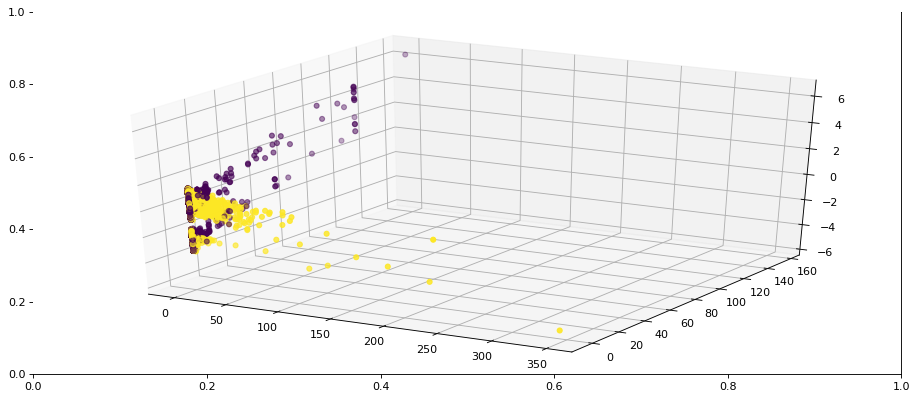

In [375]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[1],X_train[2],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


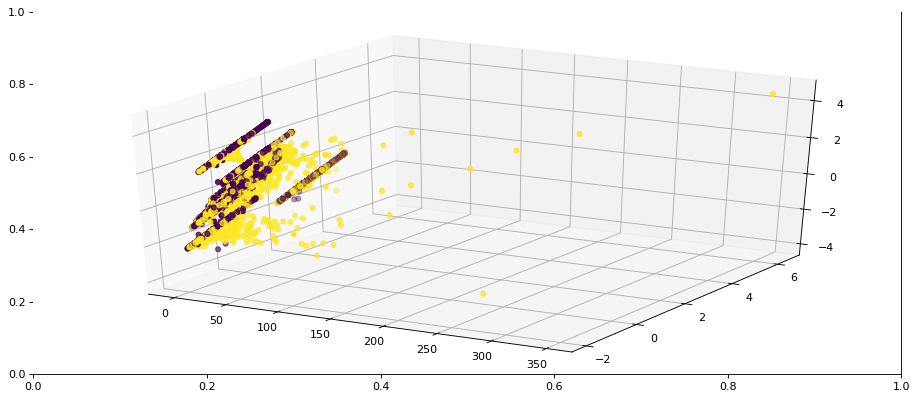

In [376]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[3],X_train[4],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


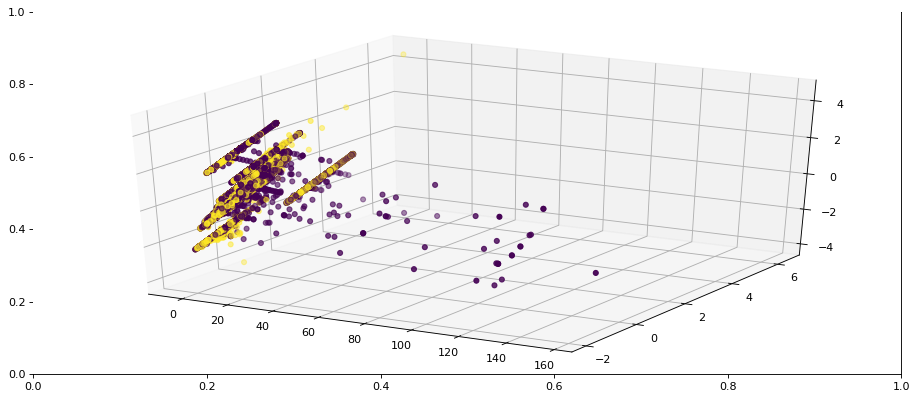

In [377]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[1],X_train[3],X_train[4],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


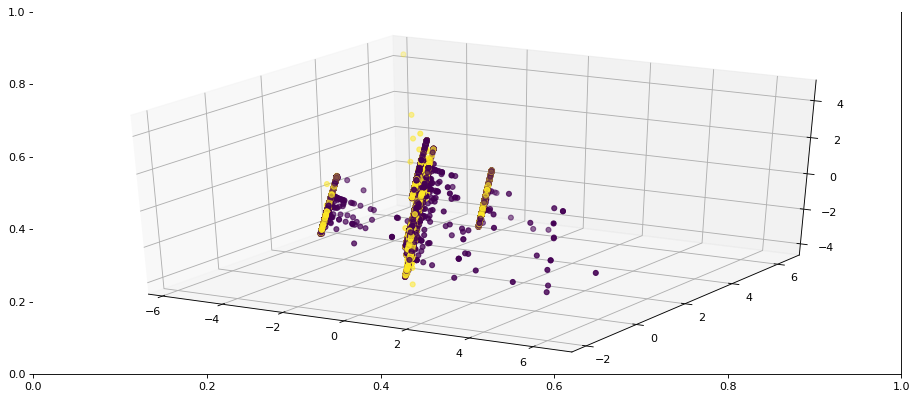

In [378]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[2],X_train[3],X_train[4],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


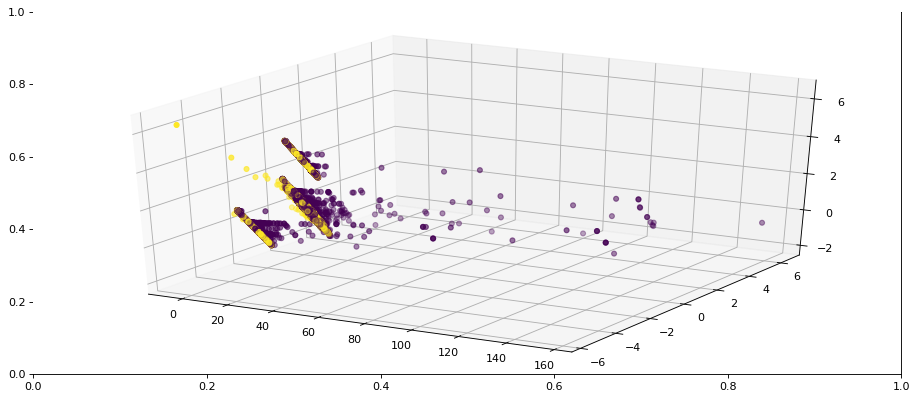

In [379]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[1],X_train[2],X_train[3],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


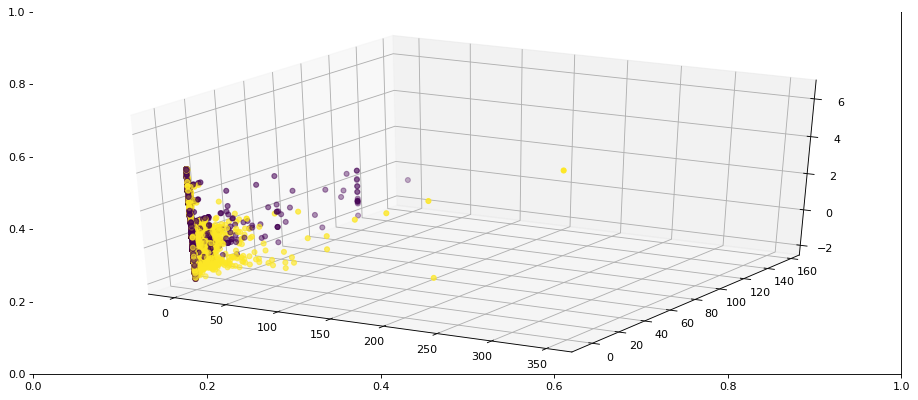

In [380]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[1],X_train[3],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


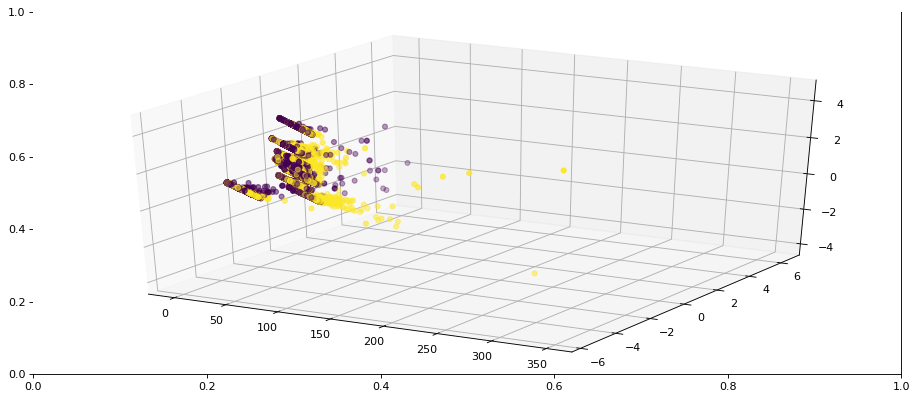

In [381]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[2],X_train[4],c=y_train)

From above scatters we can see that we can train data as we see mostly separation between failed an succeeded proejcts

# Training with Logistics regression

In [382]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
trainscore=clf.score(X_train,y_train)
testscore=clf.score(X_test,y_test)
print('training score: ',trainscore,'  , test score: ',testscore)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training score:  0.9122939080364256   , test score:  0.9107816283593347


# Training with Keras

In [383]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import sys
from tensorflow.keras.layers import LSTM, Dense, Activation

## defining layers, epocs and dimension.. converting pandas sets to numpy

In [384]:
number_of_neurons_layer1 = 150
number_of_neurons_layer2 = 120
number_of_neurons_layer3 = 40
number_of_neurons_layer4 = 40
number_of_neurons_layer5 = 1
number_of_epochs = 100
dim = X_train.shape[1]
X_train,y_train,X_test,y_test,X_validate,y_validate = X_train.to_numpy(),y_train.to_numpy(),X_test.to_numpy(),y_test.to_numpy(),X_validate.to_numpy(),y_validate.to_numpy()

In [385]:
# design network
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer5, activation='sigmoid'))
model.compile(loss='mean_squared_error',
        #optimizer='rmsprop',
        optimizer = 'adam',
        metrics=['accuracy','mae'])



In [386]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 150)               3150      
_________________________________________________________________
dense_63 (Dense)             (None, 120)               18120     
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 121       
Total params: 21,391
Trainable params: 21,391
Non-trainable params: 0
_________________________________________________________________


In [387]:
model.fit(X_train, y_train,
        batch_size=144,
        epochs=number_of_epochs,
        verbose=1,
        validation_data=(X_validate, y_validate))
        

Train on 204581 samples, validate on 50383 samples
Epoch 1/100
204581/204581 [==============================] - 10s 47us/sample - loss: 0.1190 - accuracy: 0.8389 - mae: 0.2398 - val_loss: 0.1015 - val_accuracy: 0.8618 - val_mae: 0.1788
Epoch 2/100
204581/204581 [==============================] - 9s 44us/sample - loss: 0.0894 - accuracy: 0.8827 - mae: 0.1702 - val_loss: 0.0868 - val_accuracy: 0.8831 - val_mae: 0.1587
Epoch 3/100
204581/204581 [==============================] - 9s 42us/sample - loss: 0.0731 - accuracy: 0.9037 - mae: 0.1483 - val_loss: 0.0594 - val_accuracy: 0.9208 - val_mae: 0.1306
Epoch 4/100
204581/204581 [==============================] - 9s 45us/sample - loss: 0.0597 - accuracy: 0.9219 - mae: 0.1241 - val_loss: 0.0544 - val_accuracy: 0.9316 - val_mae: 0.1185
Epoch 5/100
204581/204581 [==============================] - 9s 46us/sample - loss: 0.0532 - accuracy: 0.9307 - mae: 0.1093 - val_loss: 0.0454 - val_accuracy: 0.9413 - val_mae: 0.0982
Epoch 6/100
204581/204581 [=

204581/204581 [==============================] - 9s 45us/sample - loss: 0.0259 - accuracy: 0.9657 - mae: 0.0504 - val_loss: 0.0239 - val_accuracy: 0.9687 - val_mae: 0.0455
Epoch 46/100
204581/204581 [==============================] - 10s 47us/sample - loss: 0.0257 - accuracy: 0.9663 - mae: 0.0499 - val_loss: 0.0246 - val_accuracy: 0.9665 - val_mae: 0.0497
Epoch 47/100
204581/204581 [==============================] - 10s 48us/sample - loss: 0.0250 - accuracy: 0.9672 - mae: 0.0489 - val_loss: 0.0228 - val_accuracy: 0.9694 - val_mae: 0.0447
Epoch 48/100
204581/204581 [==============================] - 9s 43us/sample - loss: 0.0249 - accuracy: 0.9666 - mae: 0.0496 - val_loss: 0.0252 - val_accuracy: 0.9670 - val_mae: 0.0502
Epoch 49/100
204581/204581 [==============================] - 9s 45us/sample - loss: 0.0252 - accuracy: 0.9666 - mae: 0.0493 - val_loss: 0.0243 - val_accuracy: 0.9692 - val_mae: 0.0526
Epoch 50/100
204581/204581 [==============================] - 9s 42us/sample - loss: 0

204581/204581 [==============================] - 8s 41us/sample - loss: 0.0212 - accuracy: 0.9719 - mae: 0.0417 - val_loss: 0.0247 - val_accuracy: 0.9667 - val_mae: 0.0468
Epoch 90/100
204581/204581 [==============================] - 9s 42us/sample - loss: 0.0214 - accuracy: 0.9716 - mae: 0.0419 - val_loss: 0.0275 - val_accuracy: 0.9655 - val_mae: 0.0473
Epoch 91/100
204581/204581 [==============================] - 9s 42us/sample - loss: 0.0210 - accuracy: 0.9722 - mae: 0.0415 - val_loss: 0.0184 - val_accuracy: 0.9759 - val_mae: 0.0358
Epoch 92/100
204581/204581 [==============================] - 9s 42us/sample - loss: 0.0218 - accuracy: 0.9713 - mae: 0.0421 - val_loss: 0.0225 - val_accuracy: 0.9690 - val_mae: 0.0421
Epoch 93/100
204581/204581 [==============================] - 8s 40us/sample - loss: 0.0217 - accuracy: 0.9716 - mae: 0.0416 - val_loss: 0.0177 - val_accuracy: 0.9772 - val_mae: 0.0372
Epoch 94/100
204581/204581 [==============================] - 9s 44us/sample - loss: 0.0

In [388]:
testscore = model.evaluate(X_test, y_test, verbose=0)
trainscore = model.evaluate(X_train, y_train, verbose=0)
print('training MSE,accuracy,MAE: ',trainscore,'  , test MSE,accuracy,MAE: ',testscore)

training MSE,accuracy,MAE:  [0.01779171429148631, 0.9769529, 0.03574413]   , test MSE,accuracy,MAE:  [0.017893209144177996, 0.97715455, 0.03599205]


## Save model and weights

In [392]:
model_json = model.to_json()
with open("StartupStudy.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("StartupStudy.h5")
print("Saved model to disk")

Saved model to disk


In [393]:
from pickle import dump
dump(lb_style, open('lb_style.pkl', 'wb'))
dump(scaler, open('scaler.pkl', 'wb'))
dump(pca, open('pca.pkl', 'wb'))